# Parameter Distributions

## Gamma Distribution: DD1
Histology studies show that axons do not have only one fixed diameter throughout the brain, but follow an axon diameter distribution *(Aboitiz et al. 1992)*.
In Microstructure Imaging, the true axon diameter distribution is usually modeled as a Gamma distribution $\Gamma(R;\alpha,\beta)$ with $R$ the axon radius as half its diameter and $\alpha$ and $\beta$ its scale and rate parameters *(Assaf et al. 2008)*.
The probability density of a Gamma distribution is given as

\begin{equation}
 \Gamma(R;\alpha,\beta)=\frac{\beta^\alpha R^{\alpha-1}e^{-R\beta}}{\Gamma(\alpha)}
\end{equation}

with $\Gamma(\alpha)$ a Gamma function.
However, we must take the cross-sectional area of these cylinders into account to relate this Gamma distribution of cylinder radii to the signal attenuation of this distribution of cylinders.
The reason for this is that it is not the cylinders themselves, but the (simulated) particles diffusing inside these cylinders that are contributing to the signal attenuation.
The final perpendicular, intra-cylindrical signal attenuation for a Gamma-distributed cylinder ensemble, using any of the previously describe cylinder representations, is then given as

\begin{equation}
E^{\Gamma}_\perp(q,\Delta,\delta;\alpha,\beta)=\frac{\int_{\mathbb{R}^+}\overbrace{\Gamma(R;\alpha,\beta)}^{\textrm{Gamma Distribution}}\times\overbrace{E_\perp(q,\Delta,\delta,R)}^{\textrm{Cylinder Signal Attenuation}}\times \overbrace{\pi R^2}^{\textrm{Surface Correction}} dR}{\underbrace{\int_{\mathbb{R}^+}\Gamma(R;\alpha,\beta)\times \textrm{N}(R) dR}_{\textrm{Normalization}}}.
\end{equation}

When modeling cylinders, $\textrm{N}(R)$ is the surface function $\textrm{N}(R)=\pi R^2$. But, if we were to model a Gamma distribution of spheres, then it is the volume function $\textrm{N}(R)=(4/3)\pi R^3$. In fact, Dmipy internally checks what model parameter it is distributing, and normalizes the Gamma distribution accordingly.

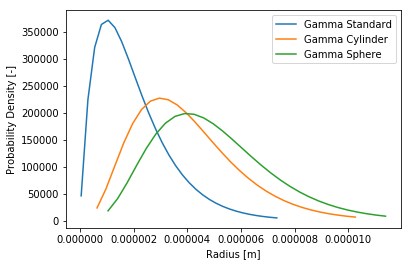

In [1]:
from dmipy.distributions import distributions
gamma_standard = distributions.DD1GammaDistribution(normalization='standard')
gamma_cylinder = distributions.DD1GammaDistribution(normalization='cylinder')
gamma_sphere = distributions.DD1GammaDistribution(normalization='sphere')

radii_std, Pstd = gamma_standard(alpha=2., beta=1e-6)
radii_cyl, Pcyl = gamma_cylinder(alpha=2., beta=1e-6)
radii_sph, Psph = gamma_sphere(alpha=2., beta=1e-6)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(radii_std, Pstd, label='Gamma Standard')
plt.plot(radii_cyl, Pcyl, label='Gamma Cylinder')
plt.plot(radii_sph, Psph, label='Gamma Sphere')
plt.legend()
plt.xlabel('Radius [m]')
plt.ylabel('Probability Density [-]');

Notice that the normalization changes a lot in the apparent shape of the Gamma distribution. The surface of cylinders grows quadratically with radius, which is why the re-normalized cylinder distribution shifts to the right. The volume of spheres grows cubicly with radius, which is why the re-normalized sphere distribution moves even more.

Upon initialization the Gamma distribution pre-calculates between which radii there is 99% of the volume under the distribution, and only samples there. This is why the different distributions produce samples at different positions, depending on $\alpha, \beta$ and the normalization.

## References

- Aboitiz, Francisco, et al. "Fiber composition of the human corpus callosum." Brain research 598.1 (1992): 143-153.
- Assaf, Yaniv, et al. "AxCaliber: a method for measuring axon diameter distribution from diffusion MRI." Magnetic resonance in medicine 59.6 (2008): 1347-1354. 